In [1]:
#i try to use the standard tf way to create a model,then i try to create a custom one with a custom training loop (the networks are the same,so i should expect the same result)
#when writing a custom training loop feed the input as a tensor with shape (size of training,1)!!!!!!!!!!!! x_=tf. expand_dims(x,-1)
import tensorflow as tf
import numpy as np
import os
import random
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font', size=16) 
from sklearn.preprocessing import MinMaxScaler
import warnings
import logging
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers
from tensorflow.keras import regularizers
tfk = tf.keras
tfkl = tf.keras.layers
print(tf.__version__)
import math
seed=42
import tensorflow as tf
import time

!pip install pyDOE

2023-09-14 18:50:37.687304: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-09-14 18:50:37.688732: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-14 18:50:37.726743: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-14 18:50:37.727197: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-14 18:50:38.538756: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

2.13.0


In [2]:
#you need to add a dataset with GaussJacobiQuadRule_V3 on the right 
import sys
# sys.path.insert(1, '/kaggle/input/quadrule')
from GaussJacobiQuadRule_V3 import Jacobi, DJacobi, GaussLobattoJacobiWeights, GaussJacobiWeights

import pyDOE

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from pyDOE import lhs
#from GaussJacobiQuadRule_V3.py import Jacobi, DJacobi, GaussLobattoJacobiWeights, GaussJacobiWeights
import time

tf.Tensor(
[[-1. ]
 [-0.9]
 [-0.8]
 [-0.7]
 [-0.6]
 [-0.5]
 [-0.4]
 [-0.3]
 [-0.2]
 [-0.1]
 [ 0. ]
 [ 0.1]
 [ 0.2]
 [ 0.3]
 [ 0.4]
 [ 0.5]
 [ 0.6]
 [ 0.7]
 [ 0.8]
 [ 0.9]
 [ 1. ]], shape=(21, 1), dtype=float32)


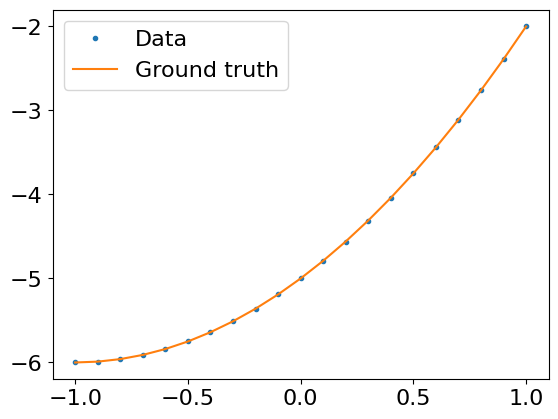

In [95]:
epochs=500
input_shape=(1,)
seed=42
n_points=21
x = tf.linspace(-1, 1, n_points)
x = tf.cast(x, tf.float32)

def f(x):
  y = x**2 + 2*x - 5
  return y

y = f(x) + 0*tf.random.normal(shape=[n_points])

plt.plot(x.numpy(), y.numpy(), '.', label='Data')
plt.plot(x, f(x),  label='Ground truth')
plt.legend()
x_=tf. expand_dims(x,-1)
y_=tf. expand_dims(y,-1)
print(x_)


In [75]:
def build_model_conv1D(input_shape):
    # Build the neural network layer by layer
    input_layer = tfkl.Input(shape=input_shape, name='Input')
 
    #kernel_regularizer=regularizers.L2(0.1)
    # Classifier
    x1 = tfkl.Dense(16, activation='relu', kernel_initializer = tfk.initializers.GlorotUniform(seed))(input_layer)
    x2 = tfkl.Dense(64, activation='relu', kernel_initializer = tfk.initializers.GlorotUniform(seed))(x1)
    x3 = tfkl.Dense(16, activation='relu', kernel_initializer = tfk.initializers.GlorotUniform(seed))(x2)
    output_layer = tfkl.Dense(1, activation='linear', kernel_initializer = tfk.initializers.GlorotUniform(seed))(x3)

    # Connect input and output through the Model class
    model = tfk.Model(inputs=input_layer, outputs=output_layer, name='model')

    # Compile the model
    model.compile(loss=tfk.losses.MeanSquaredError(),optimizer=tfk.optimizers.Adam(0.001))

    # Return the model
    return model

In [76]:
model = build_model_conv1D(input_shape)

In [77]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 1)]               0         
                                                                 
 dense_16 (Dense)            (None, 16)                32        
                                                                 
 dense_17 (Dense)            (None, 64)                1088      
                                                                 
 dense_18 (Dense)            (None, 16)                1040      
                                                                 
 dense_19 (Dense)            (None, 1)                 17        
                                                                 
Total params: 2177 (8.50 KB)
Trainable params: 2177 (8.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [78]:
history=model.fit(
    x = x_,
    y = y_,
    epochs = epochs,
    batch_size=21
    ).history

Epoch 1/1000
1/1 [==============================] - 0s 396ms/step - loss: 23.0643
Epoch 2/1000
1/1 [==============================] - 0s 4ms/step - loss: 22.9204
Epoch 3/1000
1/1 [==============================] - 0s 3ms/step - loss: 22.7824
Epoch 4/1000
1/1 [==============================] - 0s 3ms/step - loss: 22.6490
Epoch 5/1000
1/1 [==============================] - 0s 3ms/step - loss: 22.5178
Epoch 6/1000
1/1 [==============================] - 0s 3ms/step - loss: 22.3877
Epoch 7/1000
1/1 [==============================] - 0s 4ms/step - loss: 22.2612
Epoch 8/1000
1/1 [==============================] - 0s 4ms/step - loss: 22.1360
Epoch 9/1000
1/1 [==============================] - 0s 4ms/step - loss: 22.0058
Epoch 10/1000
1/1 [==============================] - 0s 3ms/step - loss: 21.8720
Epoch 11/1000
1/1 [==============================] - 0s 5ms/step - loss: 21.7348
Epoch 12/1000
1/1 [==============================] - 0s 4ms/step - loss: 21.5930
Epoch 13/1000
1/1 [================

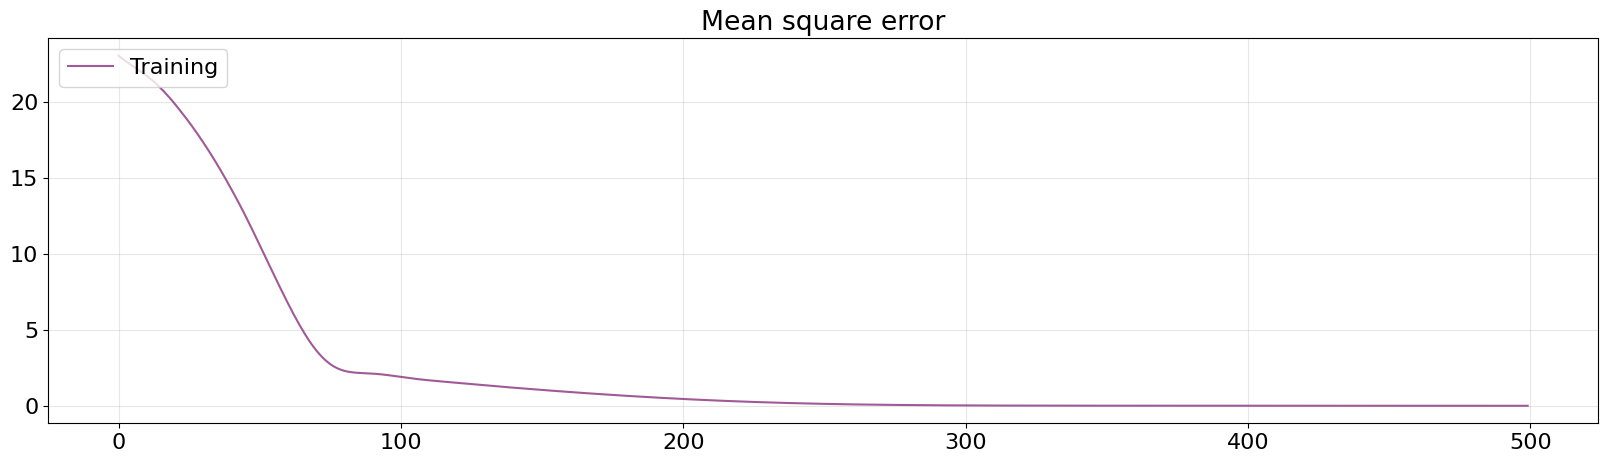

In [43]:
plt.figure(figsize=(20,5))
plt.plot(history['loss'], label='Training', alpha=.8, color='#8A307F', markersize=20)
plt.legend(loc='upper left')
plt.title('Mean square error')
plt.grid(alpha=.3)
plt.savefig('loss.png')

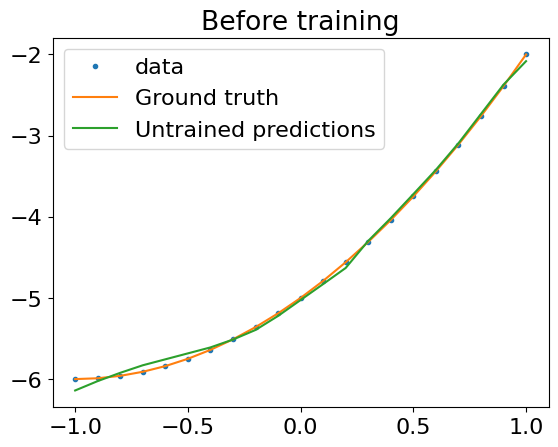

In [44]:
plt.plot(x.numpy(), y.numpy(), '.', label='data')
plt.plot(x, f(x),  label='Ground truth')
plt.plot(x, model(x), label='Untrained predictions')
plt.title('Before training')
plt.legend();

In [86]:
input_layer = tfkl.Input(shape=input_shape, name='Input')
x1 = tfkl.Dense(16, activation='relu', kernel_initializer = tfk.initializers.GlorotUniform(seed))(input_layer)
x2 = tfkl.Dense(64, activation='relu', kernel_initializer = tfk.initializers.GlorotUniform(seed))(x1)
x3 = tfkl.Dense(16, activation='relu', kernel_initializer = tfk.initializers.GlorotUniform(seed))(x2)
output_layer = tfkl.Dense(1, activation='linear', kernel_initializer = tfk.initializers.GlorotUniform(seed))(x3)


In [87]:
input_shape=(1,)
model = tf.keras.Model(input_layer, output_layer)
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 1)]               0         
                                                                 
 dense_20 (Dense)            (None, 16)                32        
                                                                 
 dense_21 (Dense)            (None, 64)                1088      
                                                                 
 dense_22 (Dense)            (None, 16)                1040      
                                                                 
 dense_23 (Dense)            (None, 1)                 17        
                                                                 
Total params: 2177 (8.50 KB)
Trainable params: 2177 (8.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


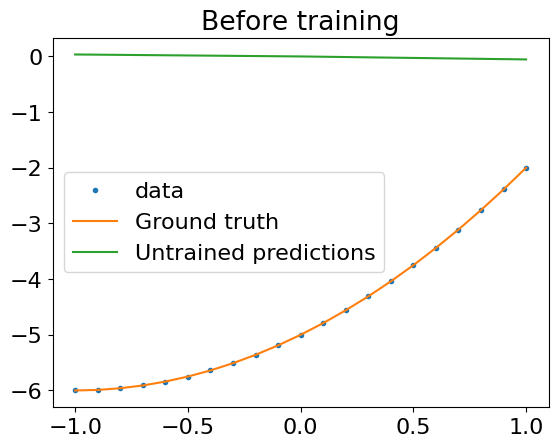

In [63]:
plt.plot(x.numpy(), y.numpy(), '.', label='data')
plt.plot(x, f(x),  label='Ground truth')
plt.plot(x, model(x), label='Untrained predictions')
plt.title('Before training')
plt.legend();

In [67]:
def custom_mse(y_true, y_pred):
    # Calculate the mean squared error without batches
    return tf.reduce_mean(tf.square(y_true - y_pred))

In [88]:
epochs=1000
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
Y=2*x_+2

for epoch in range(epochs):
    with tf.GradientTape(persistent=True) as tape:
        tape.watch(model.trainable_variables)
        predictions = model(x_)
        loss1 = tf.reduce_mean(tf.square(y_ - predictions))
        tape.watch(x_)
        grad=tape.gradient(predictions, x_)
        loss2=tf.reduce_mean(tf.square(grad -Y))
        loss=loss1+loss2
    
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    
    # Print training loss for this epoch
    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss.numpy()}")




Epoch 10/1000, Loss: 27.456886291503906
Epoch 20/1000, Loss: 25.957050323486328
Epoch 30/1000, Loss: 23.541187286376953
Epoch 40/1000, Loss: 20.67586898803711
Epoch 50/1000, Loss: 17.460102081298828
Epoch 60/1000, Loss: 14.664386749267578
Epoch 70/1000, Loss: 12.583147048950195
Epoch 80/1000, Loss: 10.523321151733398
Epoch 90/1000, Loss: 8.371190071105957
Epoch 100/1000, Loss: 6.444951057434082
Epoch 110/1000, Loss: 4.691699028015137
Epoch 120/1000, Loss: 2.987670660018921
Epoch 130/1000, Loss: 1.5103673934936523
Epoch 140/1000, Loss: 0.6209579706192017
Epoch 150/1000, Loss: 0.26087629795074463
Epoch 160/1000, Loss: 0.19740533828735352
Epoch 170/1000, Loss: 0.17713125050067902
Epoch 180/1000, Loss: 0.15825070440769196
Epoch 190/1000, Loss: 0.1495320200920105
Epoch 200/1000, Loss: 0.1480458378791809
Epoch 210/1000, Loss: 0.13578234612941742
Epoch 220/1000, Loss: 0.12910573184490204
Epoch 230/1000, Loss: 0.12005254626274109
Epoch 240/1000, Loss: 0.11607684195041656
Epoch 250/1000, Loss: 

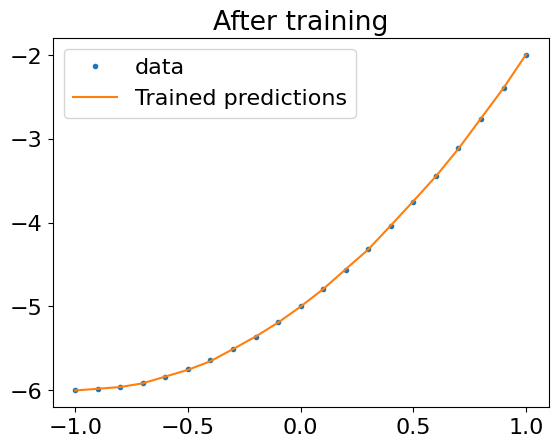

In [89]:
plt.plot(x.numpy(),y.numpy(), '.', label="data")
plt.plot(x, model(x_), label='Trained predictions')
plt.title('After training')
plt.legend();

In [91]:
def der(x):
    return 2*x+2

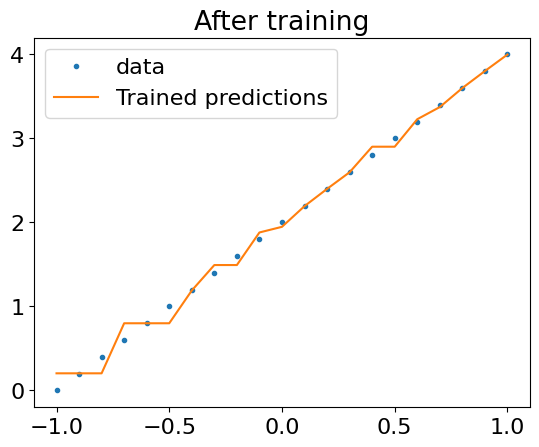

In [92]:
plt.plot(x_,der(x_), '.', label="data")
plt.plot(x, grad, label='Trained predictions')
plt.title('After training')
plt.legend();